In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Veri Madenciliği/Real Estate/Real estate.csv")
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


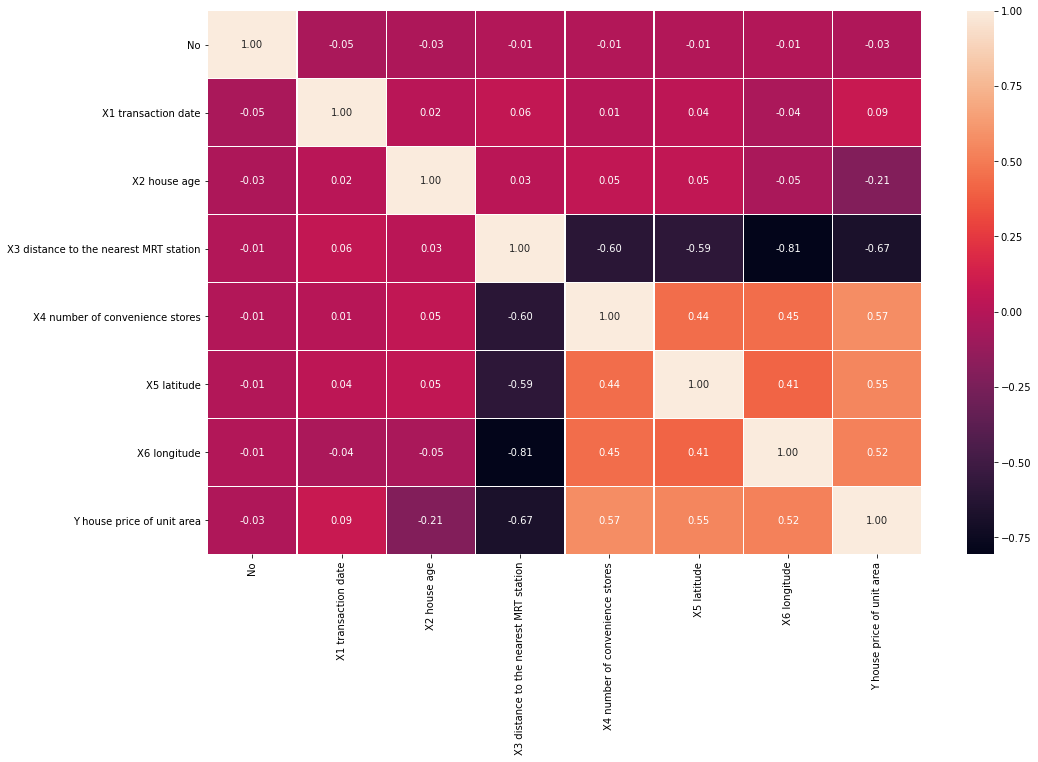

In [ ]:
f,ax=plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap=None,fmt='.2f',ax=ax)
#plt.show()

In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Data Selection

In [ ]:
#normalizing the data:
from sklearn import preprocessing
df_nor=preprocessing.normalize(df)
df_nor=pd.DataFrame(df_nor)
df_nor.columns=df.columns
df_nor

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.000495,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.000980,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.001432,0.961229,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.001909,0.961141,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.002434,0.979673,0.002434,0.190095,0.002434,0.012158,0.059156,0.020977
...,...,...,...,...,...,...,...,...
409,0.089685,0.440334,0.002997,0.892920,0.000000,0.005456,0.026578,0.003369
410,0.199460,0.976753,0.002718,0.043899,0.004368,0.012120,0.058985,0.024265
411,0.196565,0.960519,0.008969,0.186531,0.003340,0.011918,0.057987,0.019370
412,0.200288,0.976223,0.003928,0.050829,0.002425,0.012108,0.058942,0.025460


In [ ]:
x=df_nor.iloc[:,2:7]
x

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.015848,0.042037,0.004953,0.012373,0.060194
1,0.009557,0.150258,0.004411,0.012243,0.059565
2,0.006349,0.268276,0.002387,0.011928,0.058022
3,0.006349,0.268263,0.002387,0.011928,0.058019
4,0.002434,0.190095,0.002434,0.012158,0.059156
...,...,...,...,...,...
409,0.002997,0.892920,0.000000,0.005456,0.026578
410,0.002718,0.043899,0.004368,0.012120,0.058985
411,0.008969,0.186531,0.003340,0.011918,0.057987
412,0.003928,0.050829,0.002425,0.012108,0.058942


In [ ]:
y=df.iloc[:,7:8]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [ ]:
from sklearn import model_selection
from sklearn import linear_model
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train)

(331, 5)
(83, 5)
(83, 1)
     X2 house age  ...  X6 longitude
167      0.013745  ...      0.059241
164      0.000000  ...      0.059791
379      0.000000  ...      0.058586
187      0.002415  ...      0.032990
154      0.003721  ...      0.026750
..            ...  ...           ...
383      0.013760  ...      0.057471
369      0.006741  ...      0.040552
134      0.016450  ...      0.059863
309      0.012619  ...      0.050613
346      0.004946  ...      0.045528

[331 rows x 5 columns]


## Linear Regression

In [ ]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)

In [ ]:
pred_linear=lm.predict(x_test)
pred_linear2=lm.predict(x_train)


Errors for test

In [ ]:
print("Linear Regression mean_squared_error:",mean_squared_error(pred_linear,y_test))
print("Linear Regression mean_absolute_error:",mean_absolute_error(pred_linear,y_test))

Linear Regression mean_squared_error: 42.60160129063091
Linear Regression mean_absolute_error: 4.595932029809513


Errors for  train

In [ ]:
print("Linear Regression mean_squared_error:",mean_squared_error(pred_linear2,y_train))
print("Linear Regression mean_absolute_error:",mean_absolute_error(pred_linear2,y_train))

Linear Regression mean_squared_error: 70.77632203512208
Linear Regression mean_absolute_error: 5.340907250543181


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor()
ada_boost.fit(x_train,y_train)
pred_ada=ada_boost.predict(x_test)
pred_ada2=ada_boost.predict(x_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Errors for test

In [ ]:
print("AdaBoostRegressor mean_absolute_error:",mean_absolute_error(pred_ada,y_test))
print("AdaBoostRegressor mean_squared_error:",mean_squared_error(pred_ada,y_test))

AdaBoostRegressor mean_absolute_error: 5.78564552296662
AdaBoostRegressor mean_squared_error: 54.35243020194189


Errors for train

In [ ]:
print("AdaBoostRegressor mean_absolute_error:",mean_absolute_error(pred_ada2,y_train))
print("AdaBoostRegressor mean_squared_error:",mean_squared_error(pred_ada2,y_train))

AdaBoostRegressor mean_absolute_error: 5.559959082792835
AdaBoostRegressor mean_squared_error: 45.08320204332879


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)
pred_random=random_forest.predict(x_test)
pred_random2=random_forest.predict(x_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Errors for  test

In [ ]:
print("Random Forest mean_absolute_error:",mean_absolute_error(pred_random,y_test))
print("Random Forest mean_squared_error:",mean_squared_error(pred_random,y_test))

Random Forest mean_absolute_error: 4.207662650602405
Random Forest mean_squared_error: 34.733511301204786


Errors for  train

In [ ]:
print("Random Forest mean_absolute_error:",mean_absolute_error(pred_random2,y_train))
print("Random Forest mean_squared_error:",mean_squared_error(pred_random2,y_train))

Random Forest mean_absolute_error: 1.9859999999999989
Random Forest mean_squared_error: 9.260879528700913


## Bagging Regression

In [ ]:
from sklearn.ensemble import BaggingRegressor
Bagging_Regressor = BaggingRegressor()
Bagging_Regressor.fit(x_train,y_train)
pred_bagging=Bagging_Regressor.predict(x_test)
pred_bagging2=Bagging_Regressor.predict(x_train)
print("BaggingRegressor r2_score:",r2_score(pred_bagging,y_test))


BaggingRegressor r2_score: 0.6612500813594389


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Errors for  test

In [ ]:
print("BaggingRegressor mean_squared_error:",mean_squared_error(pred_bagging,y_test))
print("BaggingRegressor mean_absolute_error:",mean_absolute_error(pred_bagging,y_test))

BaggingRegressor mean_squared_error: 47.894038554216856
BaggingRegressor mean_absolute_error: 4.766987951807229


Errors for train

In [ ]:
print("BaggingRegressor mean_squared_error:",mean_squared_error(pred_bagging2,y_train))
print("BaggingRegressor mean_absolute_error:",mean_absolute_error(pred_bagging2,y_train))

BaggingRegressor mean_squared_error: 12.45779244712991
BaggingRegressor mean_absolute_error: 2.2051661631419943


## Extra Trees Regression

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees = ExtraTreesRegressor()
extra_trees.fit(x_train,y_train)
pred_extra=extra_trees.predict(x_test)
pred_extra2=extra_trees.predict(x_train)
print("Extra Trees Regression r2_score:",r2_score(pred_extra,y_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Extra Trees Regression r2_score: 0.6879051189737776


Errors for test

In [ ]:
print("Extra Trees Regression mean_absolute_error:",mean_absolute_error(pred_extra,y_test))
print("Extra Trees Regression mean_squared_error:",mean_squared_error(pred_extra,y_test))

Extra Trees Regression mean_absolute_error: 4.697506024096381
Extra Trees Regression mean_squared_error: 43.33760803614455


Errors for train

In [ ]:
print("Extra Trees Regression mean_absolute_error:",mean_absolute_error(pred_extra2,y_train))
print("Extra Trees Regression mean_squared_error:",mean_squared_error(pred_extra2,y_train))

Extra Trees Regression mean_absolute_error: 9.667673720177676e-05
Extra Trees Regression mean_squared_error: 8.217522658584847e-07


## Voting Regression

In [ ]:
from sklearn.ensemble import VotingRegressor
VotingRegressor = VotingRegressor([('lr', lm), ('rf', random_forest)])
VotingRegressor.fit(x_train,y_train)
pred_Voting=VotingRegressor.predict(x_test)
pred_Voting2=VotingRegressor.predict(x_train)
print("VotingRegressor r2_score: %",r2_score(pred_Voting,y_test)*100)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor r2_score: % 71.28469199261892


Errors for test data

In [ ]:
print("VotingRegressor mean_absolute_error:",mean_absolute_error(pred_Voting,y_test))
print("VotingRegressor mean_squared_error:",mean_squared_error(pred_Voting,y_test))

VotingRegressor mean_absolute_error: 4.107641049332024
VotingRegressor mean_squared_error: 33.453945820235575


Errors for  train data

In [ ]:
print("VotingRegressor mean_absolute_error:",mean_absolute_error(pred_Voting2,y_train))
print("VotingRegressor mean_squared_error:",mean_squared_error(pred_Voting2,y_train))

VotingRegressor mean_absolute_error: 3.4595865608210574
VotingRegressor mean_squared_error: 31.103587874267753


## Mean Squared Error Visualization

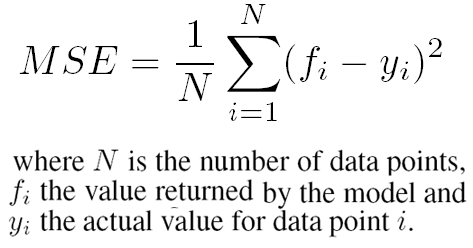

### mean squared error    for   Test Data

In [ ]:
a=mean_squared_error(pred_Voting,y_test)
b=mean_squared_error(pred_extra,y_test)
c=mean_squared_error(pred_bagging,y_test)
d=mean_squared_error(pred_random,y_test)
e=mean_squared_error(pred_ada,y_test)
f=mean_squared_error(pred_linear,y_test)

In [ ]:
print("VotingRegressor mean_squared_error:",a)
print("Extra Trees Regression mean_squared_error:",b)
print("BaggingRegressor mean_squared_error:",c)
print("Random Forest mean_squared_error:",d)
print("AdaBoostRegressor mean_squared_error:",e)
print("Linear Regression mean_squared_error:",f)

VotingRegressor mean_squared_error: 33.453945820235575
Extra Trees Regression mean_squared_error: 43.33760803614455
BaggingRegressor mean_squared_error: 47.894038554216856
Random Forest mean_squared_error: 34.733511301204786
AdaBoostRegressor mean_squared_error: 54.35243020194189
Linear Regression mean_squared_error: 42.60160129063091


In [ ]:
squared_errors_1 = pd.DataFrame({'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],'mean_squared_error_values': [f, b, e, c, d, a]})

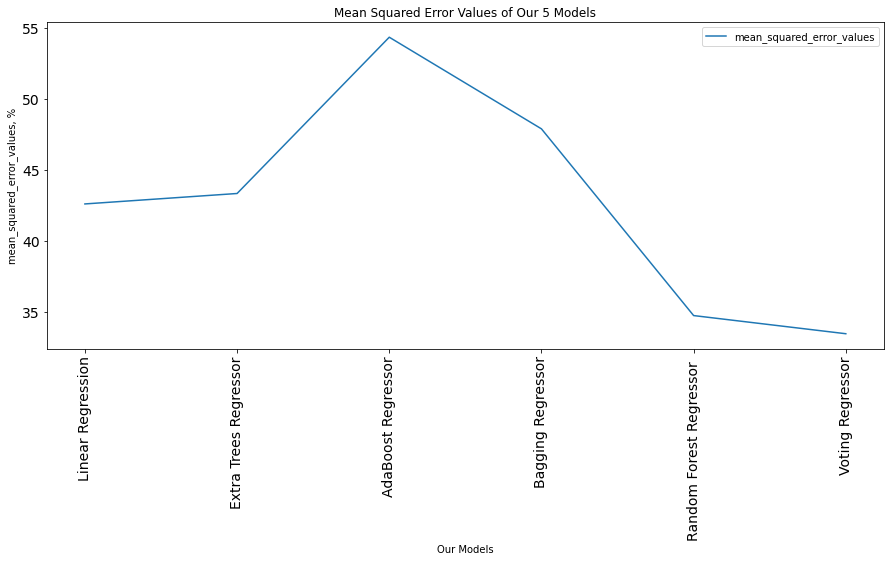

In [ ]:
plt.figure(figsize=[15,6])
x = squared_errors_1['Model']
plt.tick_params(labelsize=14)
plt.plot(x, squared_errors_1['mean_squared_error_values'], label = 'mean_squared_error_values')

plt.legend()
plt.title('Mean Squared Error Values of Our 5 Models')

plt.xlabel('Our Models')
plt.ylabel('mean_squared_error_values, %')

plt.xticks(x, rotation='vertical')
plt.show()

### mean squared error    for   Train Data

In [ ]:
g=mean_squared_error(pred_Voting2,y_train)
h=mean_squared_error(pred_extra2,y_train)
i=mean_squared_error(pred_bagging2,y_train)
j=mean_squared_error(pred_random2,y_train)
k=mean_squared_error(pred_ada2,y_train)
l=mean_squared_error(pred_linear2,y_train)

In [ ]:
squared_errors_2 = pd.DataFrame({'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],'mean_squared_error_values2': [l, h, k, i, j, g]})

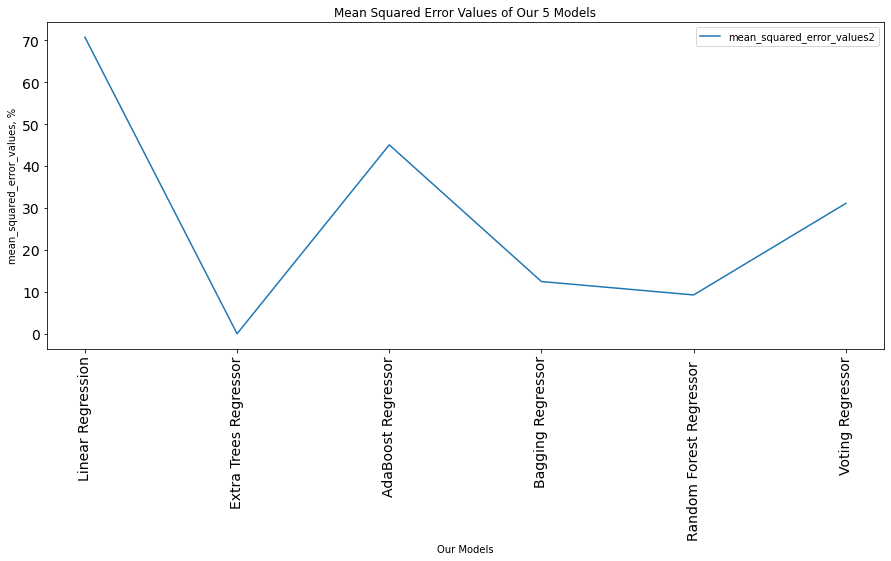

In [ ]:
plt.figure(figsize=[15,6])
x = squared_errors_2['Model']
plt.tick_params(labelsize=14)
plt.plot(x, squared_errors_2['mean_squared_error_values2'], label = 'mean_squared_error_values2')

plt.legend()
plt.title('Mean Squared Error Values of Our 5 Models')

plt.xlabel('Our Models')
plt.ylabel('mean_squared_error_values, %')

plt.xticks(x, rotation='vertical')
plt.show()

## Mean Absolute Error Visualization

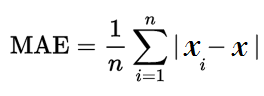

### Mean absolute error    for   Test Data

In [ ]:
a2=mean_absolute_error(pred_Voting,y_test)
b2=mean_absolute_error(pred_extra,y_test)
c2=mean_absolute_error(pred_bagging,y_test)
d2=mean_absolute_error(pred_random,y_test)
e2=mean_absolute_error(pred_ada,y_test)
f2=mean_absolute_error(pred_linear,y_test)
print(a2,b2,c2,d2,e2,f2)

4.107641049332024 4.697506024096381 4.766987951807229 4.207662650602405 5.78564552296662 4.595932029809513


In [ ]:
absolute_errors_1 = pd.DataFrame({'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],'mean_absolute_error_values': [f2, b2, e2, c2, d2, a2]})

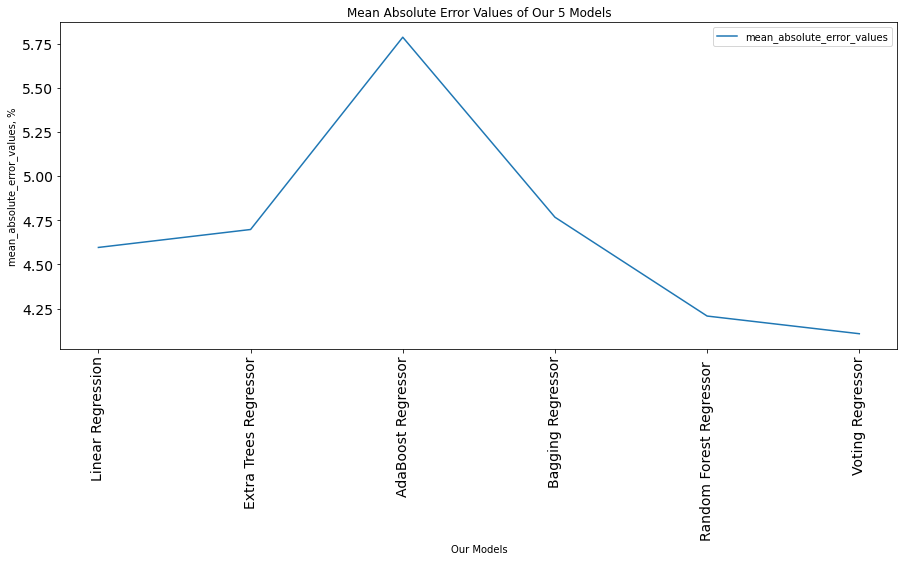

In [ ]:
plt.figure(figsize=[15,6])
x = absolute_errors_1['Model']
plt.tick_params(labelsize=14)
plt.plot(x, absolute_errors_1['mean_absolute_error_values'], label = 'mean_absolute_error_values')

plt.legend()
plt.title('Mean Absolute Error Values of Our 5 Models')

plt.xlabel('Our Models')
plt.ylabel('mean_absolute_error_values, %')

plt.xticks(x, rotation='vertical')
plt.show()

### Mean absolute error    for   Train Data

In [ ]:
g2=mean_squared_error(pred_Voting2,y_train)
h2=mean_squared_error(pred_extra2,y_train)
i2=mean_squared_error(pred_bagging2,y_train)
j2=mean_squared_error(pred_random2,y_train)
k2=mean_squared_error(pred_ada2,y_train)
l2=mean_squared_error(pred_linear2,y_train)

In [ ]:
absolute_errors_2 = pd.DataFrame({'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],'mean_absolute_error_values2': [l2, h2, k2, i2, j2, g2]})

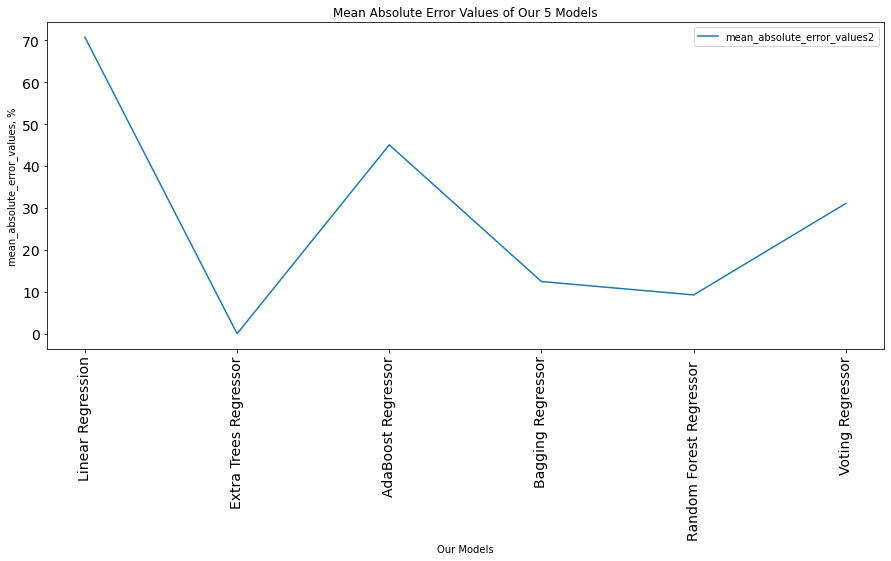

In [ ]:
plt.figure(figsize=[15,6])
x = absolute_errors_2['Model']
plt.tick_params(labelsize=14)
plt.plot(x, absolute_errors_2['mean_absolute_error_values2'], label = 'mean_absolute_error_values2')

plt.legend()
plt.title('Mean Absolute Error Values of Our 5 Models')

plt.xlabel('Our Models')
plt.ylabel('mean_absolute_error_values, %')

plt.xticks(x, rotation='vertical')
plt.show()